# About the Project - R

The objective of this project is to forecast customer attrition by utilizing a dataset that contains more than 20 features that have the potential to impact retention. Logistic regression is the sole model chosen for R analysis.


Binary classification tasks are well-suited to Logistic Regression, which provides high interpretability, enabling businesses to comprehend the extent to which individual features contribute to attrition risk. 


The primary objective is to enhance the model's capacity to accurately identify consumers who are at risk of churn. In a business setting, false positives (predicting churn when the customer would remain) are generally less expensive, as proactive retention efforts may still strengthen customer loyalty. Nevertheless, false negatives (the failure to identify a consumer who will churn) can lead to missed opportunities for intervention and lost revenue. Consequently, the model is assessed with a focus on recall for the attrition class to guarantee that retention strategies are effectively identified among at-risk customers.

# Importing the Churn Dataset

In [153]:
library(dplyr)
library(readr)
library(tidymodels)

In [135]:
df <- read.csv("TelCo.csv")

In [137]:
options(repr.matrix.max.rows=30, repr.matrix.max.cols=200)

In [9]:
head(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


# Data Preproccesing

### Searching for Duplicate Data

In [11]:
dim(df)

[1] 7043   21

In [13]:
anyDuplicated(df)

[1] 0

The anyDuplicated function output reveals that there are no duplicated rows in the dataset.

### Searching for Missing Data

In [15]:
sum(is.na(df))

[1] 11

In [17]:
summary(df)

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
                                                                          
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55

The summary function shows that the NA values are located in the TotalCharges column.


'TotalCharges' is more or less derived from a combination of 'tenure' and 'MonthlyCharges'. Because of this, including 'TotalCharges' would make the data redundant and can lead to interpretive issues and potential overfitting.

That being said, 'TotalCharges' column is going to not being used in the models, and therefore does not need to have its associated rows removed. 


### Factoring Multiclass Features 

Factoring features in R works as a one-hot encoder for the model. Features with type Factor are not separated into separate columns visually like one-hot encoder does, but when the feature is interpreted by the model it knows to create dummy variables for the features.


Our multiclass features in need of factoring are MultipleLines, InternetService, Contract, PaymentMethod.

In [19]:
head(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [21]:
df$MultipleLines <- as.factor(df$MultipleLines)

In [23]:
df$InternetService <- as.factor(df$InternetService)

In [25]:
df$Contract <- as.factor(df$Contract)

In [27]:
df$PaymentMethod <- as.factor(df$PaymentMethod)

### Changing Binary String Values into Binary Integer Values

It is necessary for the models that binary string features (Yes and No) are turned into binary integer features (0 and 1), where Yes = 1 and No = 0. This is also done for gender where male = 1 and female = 0. 

The features in need of this conversion include:
- gender
- Partner - relationship status
- Dependents
- PhoneService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- PaperlessBilling
- Churn

In [29]:
df$gender <- ifelse(test=df$gender == "Male", yes = 1, no = 0)

In [31]:
head(df$gender)

[1] 0 1 1 1 0 0

In [33]:
head(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,0,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [35]:
df$Partner <- ifelse(test=df$Partner == "Yes", yes = 1, no = 0)

In [37]:
df$Dependents <- ifelse(test=df$Dependents == "Yes", yes = 1, no = 0)

In [39]:
df$PhoneService <- ifelse(test=df$PhoneService == "Yes", yes = 1, no = 0)

In [41]:
df$OnlineSecurity <- ifelse(test=df$OnlineSecurity == "Yes", yes = 1, no = 0)

In [43]:
df$OnlineBackup <- ifelse(test=df$OnlineBackup == "Yes", yes = 1, no = 0)

In [45]:
df$DeviceProtection <- ifelse(test=df$DeviceProtection == "Yes", yes = 1, no = 0)

In [47]:
df$TechSupport <- ifelse(test=df$TechSupport == "Yes", yes = 1, no = 0)

In [49]:
df$StreamingTV <- ifelse(test=df$StreamingTV == "Yes", yes = 1, no = 0)

In [51]:
df$StreamingMovies <- ifelse(test=df$StreamingMovies == "Yes", yes = 1, no = 0)

In [53]:
df$PaperlessBilling <- ifelse(test=df$PaperlessBilling == "Yes", yes = 1, no = 0)

In [55]:
df$Churn <- ifelse(test=df$Churn == "Yes", yes = 1, no = 0)

In [57]:
str(df)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : num  0 1 1 1 0 0 1 0 0 1 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents      : num  0 0 0 0 0 0 1 0 0 1 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : num  0 1 1 0 1 1 1 0 1 1 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : num  0 1 1 1 0 0 0 1 0 1 ...
 $ OnlineBackup    : num  1 0 1 0 0 0 1 0 0 1 ...
 $ DeviceProtection: num  0 1 0 1 0 1 0 0 1 0 ...
 $ TechSupport     : num  0 0 0 1 0 0 0 0 1 0 ...
 $ StreamingTV     : num  0 0 0 0 0 1 1 0 1 0 ...
 $ StreamingMovies : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Contract        : Factor w/ 3 levels "Month-to-month",..: 1 2 1 2 1 1 1 1 1 2 ...
 $ Pa

### Creating Binary Values for Continuous Data

To do turn continuous variables into binary values 1 and 0, the data must be split into above or equal to the median (1) or below the median (0) 

#### df['tenure']

In [59]:
median(df$tenure)

[1] 29

In [61]:
df$tenure <- ifelse(test=df$tenure >= median(df$tenure), yes = 1, no = 0)

In [63]:
head(df$tenure)

[1] 0 1 0 1 0 0

#### df['MonthlyCharges']

In [65]:
median(df$MonthlyCharges)

[1] 70.35

In [67]:
df$MonthlyCharges <- ifelse(test=df$MonthlyCharges >= median(df$MonthlyCharges), yes = 1, no = 0)

In [69]:
head(df$MonthlyCharges)

[1] 0 0 0 0 1 1

### 'TotalCharges' Column Reasoning

'TotalCharges' is more or less derived from a combination of 'tenure' and 'MonthlyCharges'. Because of this, including 'TotalCharges' would make the data redundant and can lead to interpretive issues and potential overfitting.

That being said, 'TotalCharges' column is going to not being used in the models.

### Final Touches

Just some finishing touches to the dataset. While not necessary, all of the binary values should be the same type, therefore SeniorCitizen will be converted from integer to numeric.

In [71]:
df$SeniorCitizen <- as.numeric(df$SeniorCitizen)

In [73]:
str(df)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : num  0 1 1 1 0 0 1 0 0 1 ...
 $ SeniorCitizen   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents      : num  0 0 0 0 0 0 1 0 0 1 ...
 $ tenure          : num  0 1 0 1 0 0 0 0 0 1 ...
 $ PhoneService    : num  0 1 1 0 1 1 1 0 1 1 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : num  0 1 1 1 0 0 0 1 0 1 ...
 $ OnlineBackup    : num  1 0 1 0 0 0 1 0 0 1 ...
 $ DeviceProtection: num  0 1 0 1 0 1 0 0 1 0 ...
 $ TechSupport     : num  0 0 0 1 0 0 0 0 1 0 ...
 $ StreamingTV     : num  0 0 0 0 0 1 1 0 1 0 ...
 $ StreamingMovies : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Contract        : Factor w/ 3 levels "Month-to-month",..: 1 2 1 2 1 1 1 1 1 2 ...
 $ Paperles

# Model Setup

Because our dataset is now entirely binary there is no need to normalize or scale our data. However before running the model, the extra index column (X), customerID, and TotalCharges need to be removed. Our target feature needs to be converted into a factor so it can be treated as the classification feature.

In [75]:
df <- subset.data.frame(df, select = -c(customerID, TotalCharges, PhoneService))
df$Churn <- as.factor(df$Churn)

In [77]:
str(df)

'data.frame':	7043 obs. of  18 variables:
 $ gender          : num  0 1 1 1 0 0 1 0 0 1 ...
 $ SeniorCitizen   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents      : num  0 0 0 0 0 0 1 0 0 1 ...
 $ tenure          : num  0 1 0 1 0 0 0 0 0 1 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : num  0 1 1 1 0 0 0 1 0 1 ...
 $ OnlineBackup    : num  1 0 1 0 0 0 1 0 0 1 ...
 $ DeviceProtection: num  0 1 0 1 0 1 0 0 1 0 ...
 $ TechSupport     : num  0 0 0 1 0 0 0 0 1 0 ...
 $ StreamingTV     : num  0 0 0 0 0 1 1 0 1 0 ...
 $ StreamingMovies : num  0 0 0 0 0 1 0 0 1 0 ...
 $ Contract        : Factor w/ 3 levels "Month-to-month",..: 1 2 1 2 1 1 1 1 1 2 ...
 $ PaperlessBilling: num  1 0 1 0 1 1 1 0 1 0 ...
 $ PaymentMethod   : Factor w/ 4 levels "Bank transfer (automatic)",..: 3 4 4 1 3 3 2 4 3 1 .

In [79]:
#Splitting the data into train and test
set.seed(421)
split <- initial_split(df, prop = 0.8, strata = Churn)
train <- split %>% 
  training()
test <- split %>% 
  testing()

# Logistic Regression

The logistic regression model is a simple classification that looks specifically at binary values (1 and 0). It models the logrithmic odds probability of the target value equaling 1, or in this case if customer will churn.

In [81]:
#train the logistic regression model
model <- logistic_reg(mixture = double(1), penalty = double(1)) %>%
  set_engine("glmnet") %>%
  set_mode("classification") %>%
  fit(Churn ~ ., data = train)

In [83]:
model <- logistic_reg(mixture = double(1), penalty = double(1)) %>%
  set_engine("glmnet") %>%
  set_mode("classification") %>%
  fit(Churn ~ ., data = train)

tidy(model)


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-0.88530065,0
gender,-0.05434862,0
SeniorCitizen,0.26938658,0
Partner,-0.14143973,0
Dependents,-0.11054091,0
tenure,-0.88759971,0
MultipleLinesNo phone service,0.45195036,0
MultipleLinesYes,0.19430302,0
InternetServiceFiber optic,0.70136995,0


In [85]:
# Class Predictions
pred_class <- predict(model,
                      new_data = test,
                      type = "class")

In [87]:
# Class Probabilities
pred_proba <- predict(model,
                      new_data = test,
                      type = "prob")

Below, evaluates the model based on recall because of prioritization against False Negatives.

In [89]:
results <- test %>%
  select(Churn) %>%
  bind_cols(pred_class, pred_proba)

In [175]:
#recall for churners (1)
precision(results, truth = Churn, estimate = .pred_class, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6331169


In [91]:
#recall for non-churners (0)
recall(results, truth = Churn, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8966184


In [93]:
#recall for churners (1)
recall(results, truth = Churn, estimate = .pred_class, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5


This is a very low recall for our Churner group which will cause a larger number of false negatives for our model.

## Hyperparameter Tuning

In [95]:
#In the logistic_reg() function, set the mixture and penalty arguments to a call to tune().
log_reg <- logistic_reg(mixture = tune(), penalty = tune(), engine = "glmnet")

In [97]:
#Use the grid_regular() function to define a grid of possible values for mixture and penalty. 4,3
grid <- grid_regular(mixture(), penalty(), levels = c(mixture = 3, penalty = 1))

In [99]:
#The workflow() function creates an object to store the model details, which is needed when you run it many times. 
log_reg_wf <- workflow() %>%
  add_model(log_reg) %>%
  add_formula(Churn ~ .)

In [101]:
# Define the resampling method for the grid search changed from 5
folds <- vfold_cv(train, v = 5)

In [103]:
# Tune the hyperparameters using the grid search
log_reg_tuned <- tune_grid(
  metrics = metric_set(recall, roc_auc),
  log_reg_wf,
  resamples = folds,
  grid = grid,
  control = control_grid(save_pred = TRUE)
)

In [104]:
#Choose the best model using the select_best() function. You can pick from a choice of metrics that defines the "best" one. Here, we'll use the "receiver operating characteristic area under the curve" (ROC AUC) metric.
select_best(log_reg_tuned, metric = "roc_auc")
select_best

penalty,mixture,.config
<dbl>,<dbl>,<chr>
1e-10,0.5,Preprocessor1_Model2


function (x, ...) 
{
    UseMethod("select_best")
}
<bytecode: 0x7fc218417ad8>
<environment: namespace:tune>

In [106]:
# Fit the model using the optimal hyperparameters
log_reg_final <- logistic_reg(penalty = 0.00000000001, mixture = 0.5) %>%
  set_engine("glmnet") %>%
  set_mode("classification") %>%
  fit(Churn~., data = train)

In [108]:
# Evaluate the model performance on the testing set
pred_class <- predict(log_reg_final,
                      new_data = test,
                      type = "class")
results <- test %>%
  select(Churn) %>%
  bind_cols(pred_class, pred_proba)

In [110]:
# Create confusion matrix
conf_mat(results, truth = Churn,
         estimate = .pred_class)

          Truth
Prediction   0   1
         0 922 179
         1 113 195

In [112]:
recall(results, truth = Churn,
       estimate = .pred_class, event_level = "second") #putting event_level = second shows recall for Churners (1)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5213904


In [114]:
accuracy(results, truth = Churn,
       estimate = .pred_class, event_level = "second") 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7927608


The largest recall for Churners (1) that could be output by changing penalty and mixture parameters is 52%.

In [116]:
#Understanding the features impacting whether a customer will churn. Only features with estimates larger than 0.5 are considered.
coeff <- tidy(log_reg_final) %>% 
  arrange(desc(abs(estimate))) %>% 
  filter(abs(estimate) > 0.5)

coeff

term,estimate,penalty
<chr>,<dbl>,<dbl>
ContractTwo year,-1.8230555,1e-11
tenure,-0.9392636,1e-11
(Intercept),-0.9152513,1e-11
ContractOne year,-0.8865652,1e-11
InternetServiceFiber optic,0.8496650,1e-11
InternetServiceNo,-0.7505403,1e-11
MultipleLinesNo phone service,0.5069904,1e-11


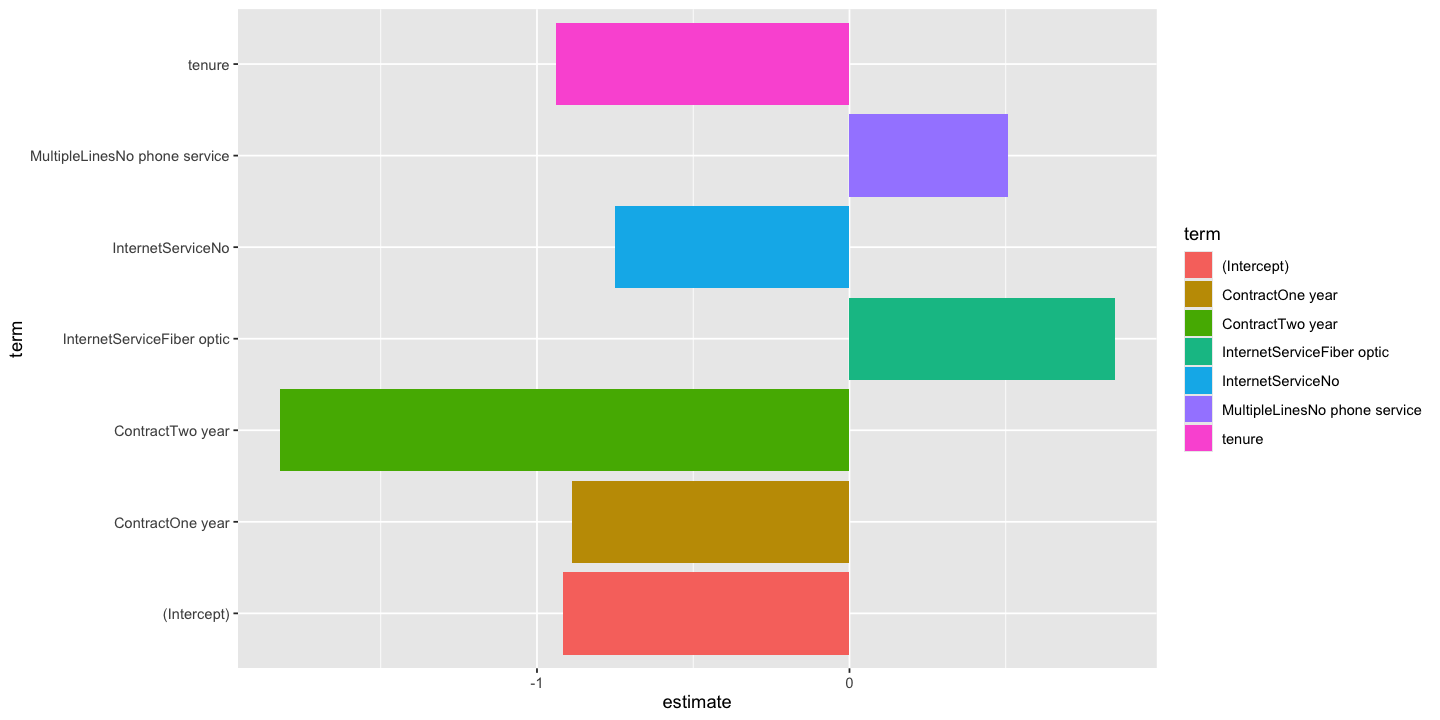

In [118]:
#Plot the feautre importance using the ggplot() function
options(repr.plot.width = 12, repr.plot.height = 6)  # Adjust to your needs
ggplot(coeff, aes(x = term, y = estimate, fill = term)) + geom_col() + coord_flip()

The graph above illustrates the features with estimates greater than 0.5. Intercept represents the dropped value for multiclass features when the log regression model engine 'glmnet' converts the factored features into dummy variables. This is done to reduce multicollinearity which can cause issues in model performance and feature estimates. 

### "Intercept" represents:
 - InternetService_DSL
 - Contract_Month-to-month
 - MultipleLines_No
 - PaymentMethod_BankTransfer

# Further Analysis of Results

The below code was provided by ChatGPT to create a coefficient table and graph the results. Because the engine used for the logistic regression model was "glmnet", there is no output about standard error or p-values, but it allows us to add penalty and mixture parameters to create a more feature importance-based model.


- OpenAI. (2025, August 4). Conversation with ChatGPT about interpreting logistic regression, standard errors, and ggplot customization in R. ChatGPT (Version 4.0) [Large language model]. https://chat.openai.com/

In [120]:
coeff <- tidy(log_reg_final) %>% 
  arrange(desc(abs(estimate))) %>% 
  filter(abs(estimate) > 0) %>% 
  mutate(percent_odds_change = (exp(estimate) - 1) * 100)

Below is the coeff table for the dataset features ordered by the absolute value of percent_odds_change. This table includes every feature.

In [122]:
coeff[order(abs(coeff$percent_odds_change), decreasing = TRUE),]

term,estimate,penalty,percent_odds_change
<chr>,<dbl>,<dbl>,<dbl>
InternetServiceFiber optic,0.84966503,1e-11,133.886327
ContractTwo year,-1.82305550,1e-11,-83.846856
MultipleLinesNo phone service,0.50699042,1e-11,66.028690
tenure,-0.93926360,1e-11,-60.908440
(Intercept),-0.91525133,1e-11,-59.958402
ContractOne year,-0.88656522,1e-11,-58.793131
InternetServiceNo,-0.75054027,1e-11,-52.788858
PaymentMethodElectronic check,0.38291481,1e-11,46.655309
PaperlessBilling,0.34712479,1e-11,41.499329


In [179]:
coeff$fill_color <- ifelse(coeff$percent_odds_change > 0, "red", "darkgreen")

In [ ]:
  ggplot(data, aes(x, y)) +
      geom_point() +
      theme(panel.border = element_rect(colour = "black", fill = NA, size = 1))

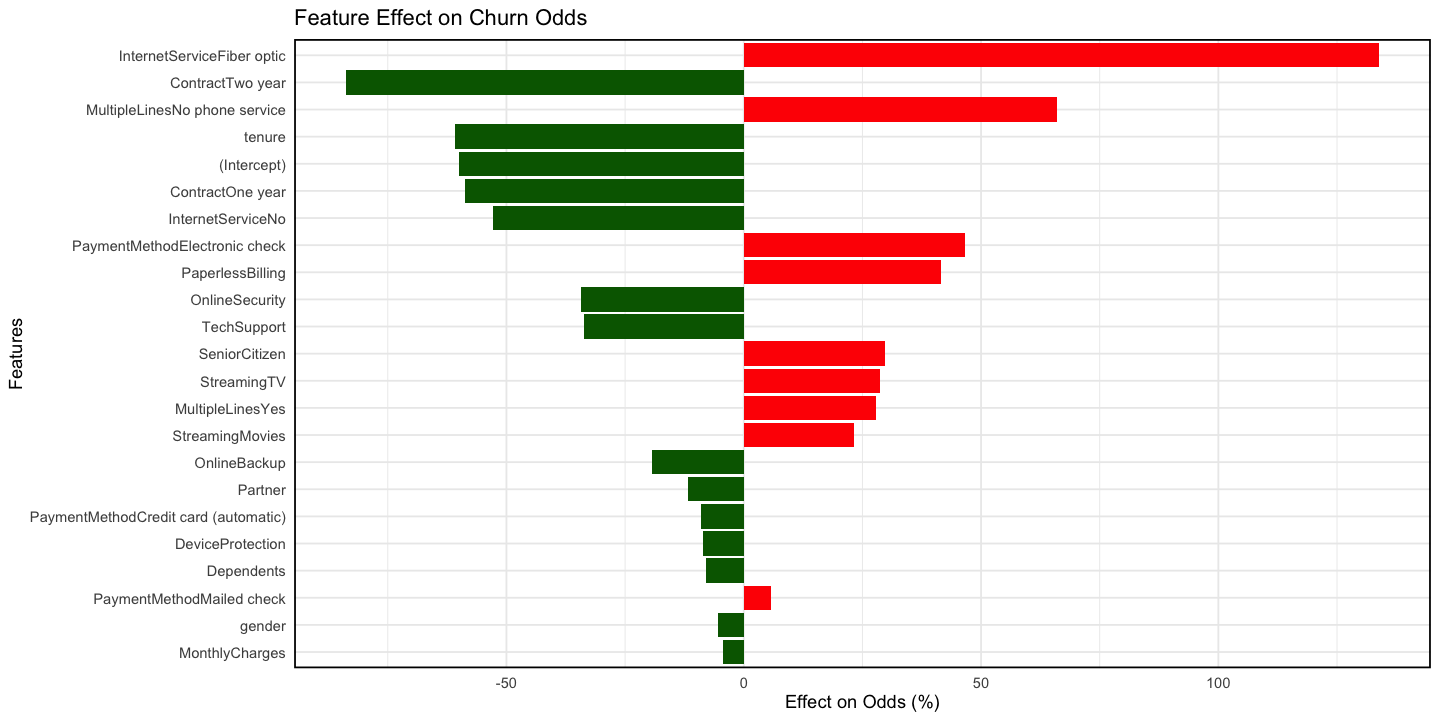

In [217]:
ggplot(coeff, aes(x = reorder(term, abs(percent_odds_change)), 
                  y = percent_odds_change, 
                  fill = fill_color)) +
  geom_col() +  # black outline around each bar
  coord_flip() +
  labs(
    x = "Features",
    y = "Effect on Odds (%)",
    title = "Feature Effect on Churn Odds"
  ) +
  scale_fill_identity() +  
  theme_minimal() +
  theme(
    legend.position = "none",
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)  # black box around plot
  )

# Conclusion 

Although the R and Python logistic regression models both offered valuable insights into customer churn, they differed in terms of their efficacy and the weight they placed on specific features.


 The Python model, which was constructed using sklearn, obtained an overall accuracy of 82% and a churner recall of 58%.  The R model, which was constructed using glmnet, yielded a slightly lower accuracy of 79% and a churner recall of 52%.  Tuning the penalty and mixture parameters in R exacerbated the challenge of explicitly prioritizing churner recall.


 In terms of feature prominence, the top predictors were closely aligned between both models; however, their effect sizes and feature rankings beyond the top three varied.
 - In both models, fiber optic internet service was the primary churn driver, increasing the likelihood of attrition by 167% in Python and 134% in R.
 - The most effective protective factor was a two-year contract, which decreased the likelihood of attrition by 85% in Python and 84% in R.
 The attrition rate in both cases was reduced by approximately 60% as a result of the one-year contract that followed.
 - InternetService_No was also protective in both cases, reducing the likelihood of attrition by 59% in Python and 53% in R.
 - Tenure was ranked within the top five in R (−61% effect) but just outside the top five in Python (−55%).


 It is important to note that the MultipleLines_No phone service had a larger impact in R (+66% churn probabilities) than in Python (+50%), indicating that the R model places a greater emphasis on this factor.


 In general, the models identified the same top churn indicators, with tenure, internet service, and contract type emerging as the most significant.  The R model placed a greater emphasis on features such as tenure and multiple lines, while the Python model demonstrated stronger recall and clearer interpretability.  These discrepancies may be attributed to the "glmnet" engine in R, which applies parameters to the model, including penalty and mixture, as well as the potential impact of the baseline intercept on the results.

# References

- Choudhury, A. (2023, August 14). Logistic Regression in R: The Ultimate Tutorial with Examples. DataCamp. https://www.datacamp.com/tutorial/logistic-regression-R


- Johns Hopkins University. (2025, January 10). R Programming [Online course]. Coursera. https://www.coursera.org/learn/r-programming


- OpenAI. (2025). ChatGPT (Version 4.0) [Large language model]. https://chat.openai.com/

- Starmer, J. [StatQuest with Josh Starmer]. (2017, November 14). Logistic Regression in R, Clearly Explained!!!! [Video]. YouTube. https://www.youtube.com/watch?v=zAULhNrnuL4
